## 作業 (Python 基礎)

1. 請使用 pip 將 jieba 安裝在自己的電腦上
2. 閱讀jieba 相關的文件，了解jieba 的用法
3. 請將蔡英文演說文 (https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/speech_tsai.txt) 下載存入到自己電腦
4. 請使用python 的檔案操作方法讀取新聞
5. 請使用 jieba 將演說文切詞
6. 請統計該演說文最常出現的十大字詞

In [1]:
! pip install jieba

In [1]:
import jieba

jieba.enable_paddle()# 启动paddle模式。 0.40版之后开始支持，早期版本不支持
strs=["我来到北京清华大学","乒乓球拍卖完了","中国科学技术大学"]
for str in strs:
    seg_list = jieba.cut(str,use_paddle=True) # 使用paddle模式
    print("Paddle Mode: " + '/'.join(list(seg_list)))

Paddle enabled successfully......


Paddle Mode: 我/来到/北京清华大学
Paddle Mode: 乒乓球/拍卖/完/了
Paddle Mode: 中国科学技术大学


In [3]:
import jieba

strs=["我来到北京清华大学","乒乓球拍卖完了","中国科学技术大学"]
for str in strs:
    seg_list = jieba.cut(str,use_paddle=False) 
    print('/'.join(list(seg_list)))

我/来到/北京/清华大学
乒乓球/拍卖/完/了
中国/科学技术/大学


In [4]:
! wget https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/speech_tsai.txt

--2020-07-18 01:43:57--  https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/speech_tsai.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6579 (6.4K) [text/plain]
Saving to: ‘speech_tsai.txt’

speech_tsai.txt     100%[===================>]   6.42K  --.-KB/s    in 0s      

2020-07-18 01:43:57 (50.5 MB/s) - ‘speech_tsai.txt’ saved [6579/6579]



In [5]:
! head speech_tsai.txt

大會主席蘇嘉全院長、現場各位貴賓、電視機前和網路上的全體國人同胞，大家早安，大家好。

今天，是中華民國一百零八年的國慶日，謝謝來自世界各地的好朋友，跟我們共度這個值得紀念的日子。

去年，也是在國慶日，我和大家說，台灣正處在變局當中。世界貿易局勢的變動、國際政治情勢的變化，都讓未來充滿挑戰。我們必須「求穩、應變、進步」，厚植實力、壯大台灣。

轉眼又過了一年，世界依然快速變化，甚至更加劇烈。美中貿易戰的持續進行；距離我們不遠的香港，因為「一國兩制」的失敗，正處於失序邊緣。

儘管如此，中國依然以「一國兩制台灣方案」，不斷威脅我們，並採取各種文攻武嚇，強烈挑戰了區域的穩定及和平。



In [6]:
import jieba
with open('speech_tsai.txt') as f:
  speech = f.read()

In [10]:
words = []
for word in jieba.cut(speech):
  words.append(word)

### Method 1

In [16]:
dic = {}
for word in words:
  if len(word) >=2:
    if word not in dic:
      dic[word] = 1
    else:
      dic[word] = dic[word] + 1

In [17]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)
swd[0:10]

[('我們', 43),
 ('台灣', 19),
 ('挑戰', 12),
 ('人民', 9),
 ('經濟', 8),
 ('中華民國', 7),
 ('一次', 7),
 ('未來', 6),
 ('自由民主', 6),
 ('世界', 5)]

### Method 2

In [18]:
dic = {}
for word in words:
  if len(word) >=2:
    dic[word] = dic.get(word,0) + 1

In [19]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)
swd[0:10]

[('我們', 43),
 ('台灣', 19),
 ('挑戰', 12),
 ('人民', 9),
 ('經濟', 8),
 ('中華民國', 7),
 ('一次', 7),
 ('未來', 6),
 ('自由民主', 6),
 ('世界', 5)]

### Method 3

In [21]:
from collections import Counter
c = Counter([w for w in words if len(w) >=2])
c.most_common(10)

[('我們', 43),
 ('台灣', 19),
 ('挑戰', 12),
 ('人民', 9),
 ('經濟', 8),
 ('中華民國', 7),
 ('一次', 7),
 ('未來', 6),
 ('自由民主', 6),
 ('世界', 5)]

## 決策樹

In [22]:
from sklearn.datasets import load_iris

iris = load_iris()

In [23]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [25]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]
a * b

TypeError: ignored

In [28]:
for i,j in zip(a, b):
  print(i * j)

2
12
30
56
90


In [30]:
ary = []
for i,j in zip(a, b):
  ary.append(i * j)
ary

[2, 12, 30, 56, 90]

In [31]:
import numpy as np
np.array(a)

array([1, 3, 5, 7, 9])

In [32]:
na = np.array(a)
nb = np.array(b)
na * nb

array([ 2, 12, 30, 56, 90])

In [33]:
iris.data.shape

(150, 4)

In [34]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [36]:
len(iris.target)

150

In [37]:
iris.target[0:3]

array([0, 0, 0])

In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
predicted = clf.predict(iris.data)

In [47]:
sum(predicted == iris.target) / len(iris.target)

1.0

In [48]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')

In [49]:
! cat tree.dot

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsampl

In [53]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 2, random_state = 42)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [54]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')

In [55]:
! cat tree.dot

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]"] ;
2 -> 4 ;
}

In [56]:
predicted = clf.predict(iris.data)

In [58]:
sum(predicted == iris.target) / len(iris.target)

0.96

In [59]:
X = iris.data[:, [2, 3]]
y = iris.target
clf = tree.DecisionTreeClassifier(max_depth=2, random_state = 42)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

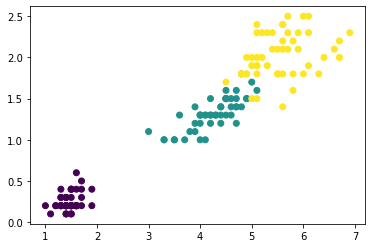

In [60]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1], c = iris.target)

In [63]:
clf.predict(np.array([[1,0.25]]))

array([0])

In [68]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_min, x_max,y_min, y_max

(0.0, 7.9, -0.9, 3.5)

In [65]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [67]:
xx.shape

(44, 79)

In [69]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 0. , -0.9],
       [ 0.1, -0.9],
       [ 0.2, -0.9],
       ...,
       [ 7.6,  3.4],
       [ 7.7,  3.4],
       [ 7.8,  3.4]])

In [70]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [71]:
Z

array([0, 0, 0, ..., 2, 2, 2])

In [73]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

Text(0, 0.5, 'Petal.Width')

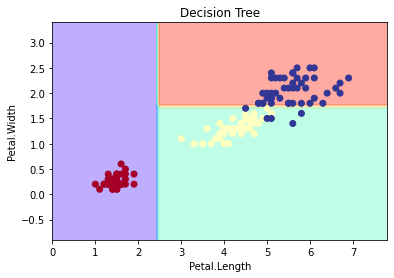

In [75]:
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')

## 迴歸模型

In [76]:
from sklearn.linear_model import LogisticRegression

In [80]:
clf = LogisticRegression(max_iter= 1000)
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
predicted = clf.predict(iris.data)

In [84]:
sum(predicted == iris.target) / len(iris.target)

0.9733333333333334

In [85]:
X = iris.data[:, [2, 3]]
y = iris.target
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

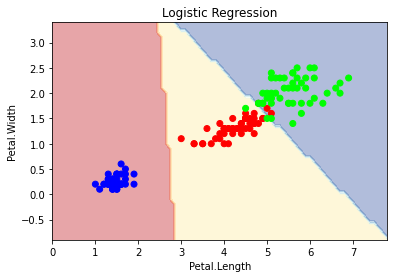

150

In [86]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

## Numpy

In [87]:
import numpy as np
na = np.array([1,2,3,4,5])

In [88]:
na

array([1, 2, 3, 4, 5])

In [89]:
na.append

AttributeError: ignored

In [91]:
np.array([1,2,3,4,5, 'qoo'])

array(['1', '2', '3', '4', '5', 'qoo'], dtype='<U21')

## Numpy v.s. List
- Numpy: 必須所有資料都同一類型
- Numpy: 不得增減裡面的物件數量

In [92]:
na

array([1, 2, 3, 4, 5])

In [93]:
na[0]

1

In [94]:
na[1:3]

array([2, 3])

In [95]:
na > 3

array([False, False, False,  True,  True])

In [96]:
na[na > 3]

array([4, 5])

In [97]:
na = np.array([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10]])

In [98]:
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [99]:
na.shape

(2, 5)

In [100]:
na[0,0]

1

In [101]:
na[0,:]

array([1, 2, 3, 4, 5])

In [112]:
na[:,0]

array([1, 6])

In [103]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [104]:
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [105]:
na.reshape(5,2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [106]:
x = np.array([20,3,100,10])

In [107]:
x.shape

(4,)

In [110]:
w = np.random.randn(4,5)

In [111]:
np.dot(x,w)

array([ -43.60132607,  122.12712989,  112.6195485 , -128.73337904,
        -57.30324349])